### We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. 

#### Here are some of the columns in the dataset:

- Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Major code.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample_size - Sample size (unweighted) of full-time.
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total.
- Employed - Number employed.
- Median - Median salary of full-time, year-round workers.
- Low_wage_jobs - Number in low-wage service jobs.
- Full_time - Number employed 35 hours or more.
- Part_time - Number employed less than 35 hours.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
recent_grads = pd.read_csv('../Datasets/recent-grads.csv')

In [2]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [4]:
#shape before removing na values
recent_grads.shape

(173, 21)

In [5]:
# removing the colums with na values
recent_grads = recent_grads.dropna()

In [6]:
#shape after removing the na values
recent_grads.shape

(172, 21)

## Pandas, Scatter Plots:

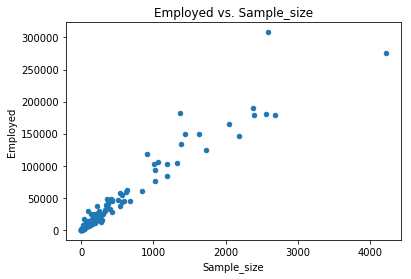

In [7]:
recent_grads.plot(x = 'Sample_size', y = 'Employed', kind = 'scatter', title = 'Employed vs. Sample_size')

Text(0.5, 1.0, 'Sample_size vs Employed')

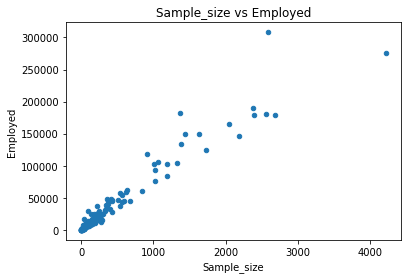

In [8]:
#we can get the underlying axes object by assigning the result to an object:
ax = recent_grads.plot(x='Sample_size', y='Employed', kind = 'Scatter')
ax.set_title("Sample_size vs Employed")

Generating scatter plots of explore reationships between following columns:

- Sample_size and Median
- Sample_size and Unemployment_rate
- Full_time and Median
- ShareWomen and Unemployment_rate
- Men and Median
- Women and Median

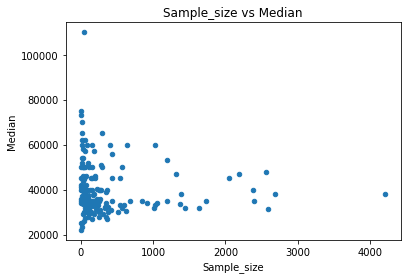

In [9]:
recent_grads.plot(x='Sample_size',y='Median',kind = 'Scatter', title='Sample_size vs Median')

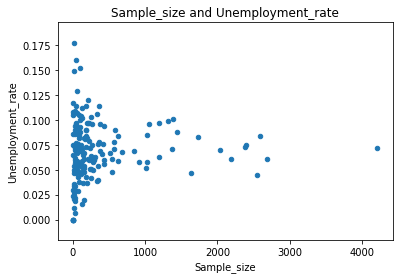

In [10]:
recent_grads.plot(x='Sample_size',y='Unemployment_rate',kind='Scatter',title = 'Sample_size and Unemployment_rate')

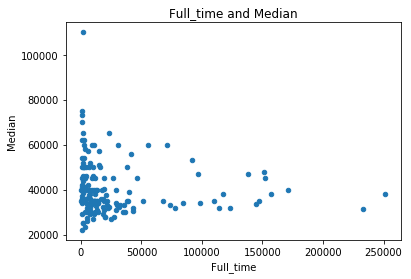

In [11]:
recent_grads.plot(x='Full_time',y='Median',kind='Scatter',title='Full_time and Median')

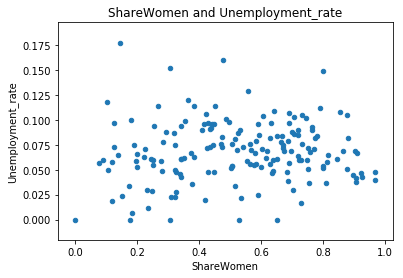

In [12]:
recent_grads.plot(x='ShareWomen',y='Unemployment_rate',kind='Scatter', title = 'ShareWomen and Unemployment_rate')

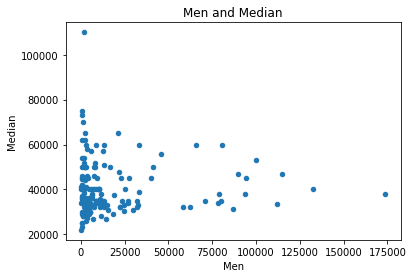

In [13]:
recent_grads.plot(x='Men',y='Median',kind = 'Scatter',title='Men and Median')

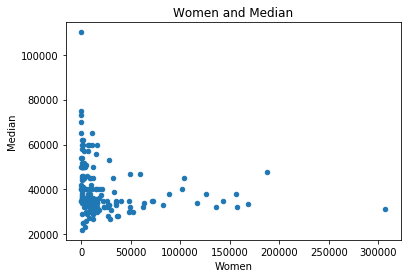

In [14]:
recent_grads.plot(x='Women',y='Median',kind='Scatter', title= 'Women and Median')

From the above plot we can observe that:
- 80% of the Men and Women with full time jobs were earning more.
- There were unemployed women in every share of major.
- Umemployment rate is less that 15% in the sample size.

## Pandas, Histograms

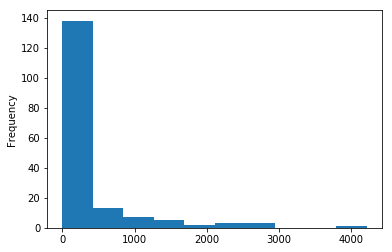

In [15]:
#we can use plt.plot or we can use series.hist
#plot does not allow to mention bin size in the parameters where as series.hist allows to mention bin size in parameters
#lets expolore first way:
recent_grads['Sample_size'].plot(kind='hist')

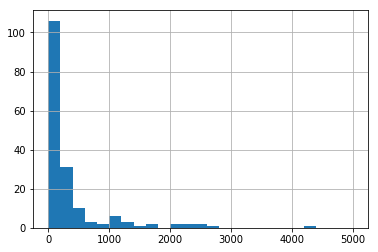

In [16]:
recent_grads['Sample_size'].hist(bins=25, range=(0,5000))

Lets explore generating histograms for following columns:
- Sample_size
- Median
- Employed
- Full_time
- ShareWomen
- Unemployment_rate
- Men
- Women

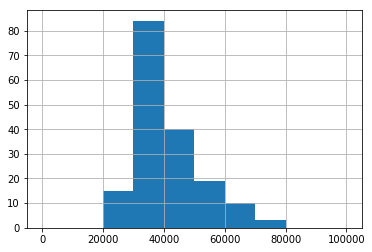

In [17]:
recent_grads['Median'].hist(bins = 10,range = (0,100000))

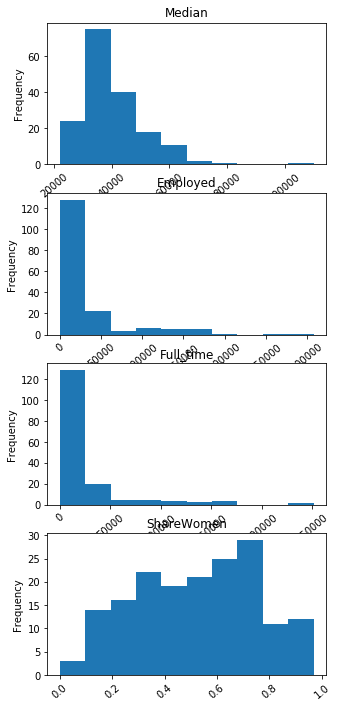

In [24]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize= (5,12))
for r in range(1,5):
    ax = fig.add_subplot(4,1,r)
    ax.set_title(cols[r])
    ax = recent_grads[cols[r]].plot(kind='hist',rot = 40)

From the histogram plot we can observe that:
- top 25% median ranges between 30,000 - 45,000 
- median salary ranges between 20,000 - 60,000
- 80% have Fulltime job.
- 80% are employed.
- share of women is distributed among different majors with highest being 0.8.

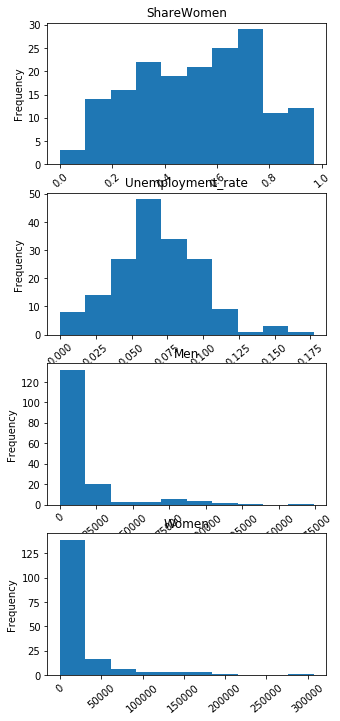

In [28]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,12))
for r in range(4,8):
    ax = fig.add_subplot(4,1,r-3)
    ax.set_title(cols[r])
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40)

## Scatter Matrix:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121c8cf98>,
      dtype=object)

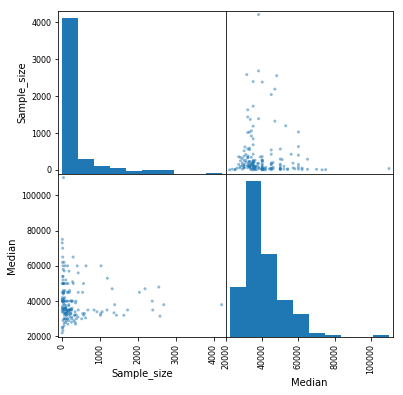

In [29]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size','Median']], figsize=(6,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120ac7dd8>,
      dtype=object)

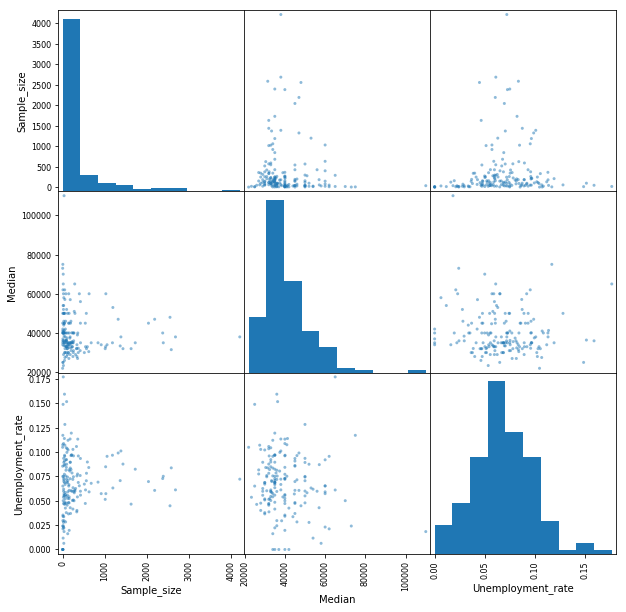

In [30]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

# Pandas, Bar Plots

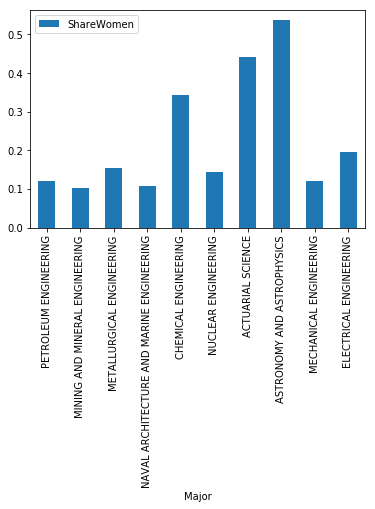

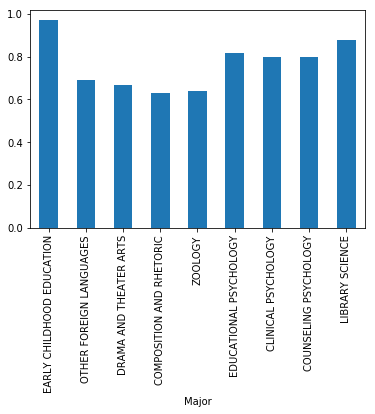

In [31]:
recent_grads[:10].plot.bar(x="Major", y = "ShareWomen", legend = True)
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend = False)

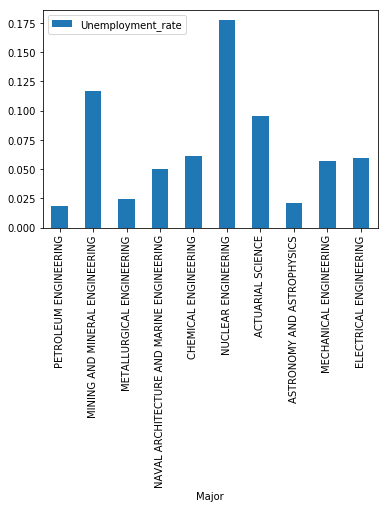

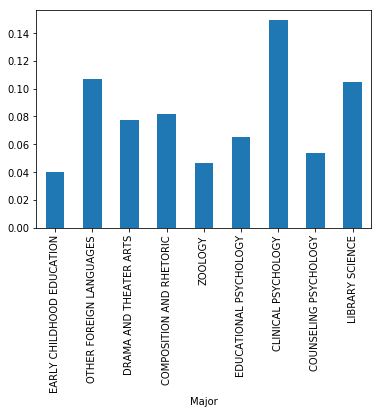

In [32]:
recent_grads[:10].plot.bar(x="Major", y = "Unemployment_rate", legend = True)
recent_grads[163:].plot.bar(x='Major', y='Unemployment_rate', legend = False)